In [1]:
import pandas as pd

# Load data
data = pd.read_csv('Electric_Vehicle_Population_Data.csv')


In [5]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C05P,Yakima,Yakima,WA,98903.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
1,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN
2,5YJSA1E24G,King,Seattle,WA,98103.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43.0,187728201,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1N4AZ1CP5J,King,Shoreline,WA,98177.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,249867971,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
4,5YJ3E1EA6J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,223792649,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10


In [3]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,153827.000000,153830.000000,153830.000000,153830.000000,153491.000000,1.538300e+05,1.538270e+05
mean,98171.496226,2020.100780,65.727673,1273.032276,29.302558,2.124161e+08,5.297335e+10
std,2437.224154,3.019617,95.147219,9086.044139,14.828506,8.054800e+07,1.620212e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.713098e+08,5.303301e+10
50%,98122.000000,2021.000000,17.000000,0.000000,33.000000,2.183278e+08,5.303303e+10
75%,98370.000000,2023.000000,84.000000,0.000000,43.000000,2.415062e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [4]:
# Count the occurrences of each unique car model
most_used_cars = data['Model'].value_counts()

# Display the top 10 most used cars
most_used_cars.head(10)

Model
MODEL Y           29209
MODEL 3           27740
LEAF              13276
MODEL S            7533
BOLT EV            5910
MODEL X            5071
VOLT               4867
ID.4               3165
NIRO               2972
MUSTANG MACH-E     2809
Name: count, dtype: int64

In [12]:
# Group by brand and model, then count the occurrences
most_used_cars = data.groupby(['Make', 'Model']).size().reset_index(name='Count')

# Sort the result by the count in descending order to get the most used cars at the top
most_used_cars = most_used_cars.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Display the top 10 most used cars alongside their brand
most_used_cars.head(10)

,Make,Model,Count
0,TESLA,MODEL Y,29209
1,TESLA,MODEL 3,27740
2,NISSAN,LEAF,13276
3,TESLA,MODEL S,7533
4,CHEVROLET,BOLT EV,5910
5,TESLA,MODEL X,5071
6,CHEVROLET,VOLT,4867
7,VOLKSWAGEN,ID.4,3165
8,KIA,NIRO,2972
9,FORD,MUSTANG MACH-E,2809


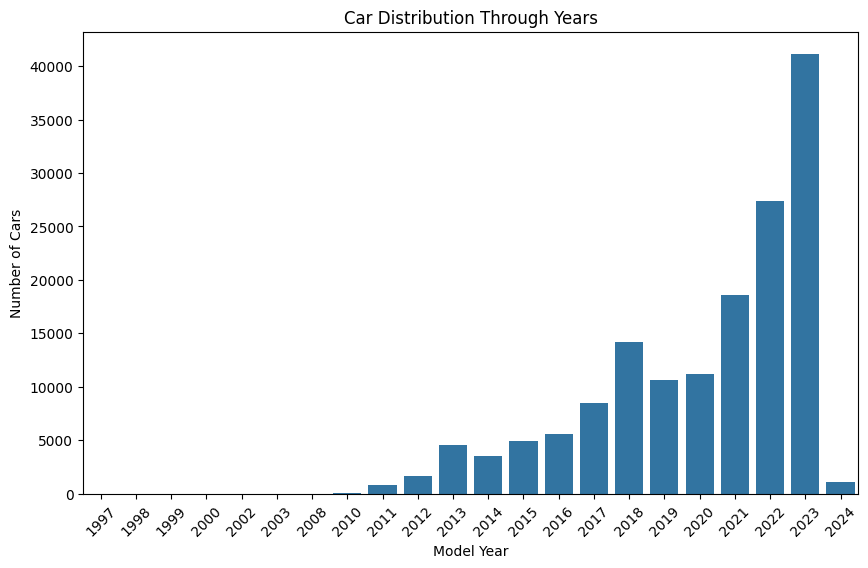

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each model year
car_year_distribution = data['Model Year'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10,6))
sns.barplot(x=car_year_distribution.index, y=car_year_distribution.values)
plt.title('Car Distribution Through Years')
plt.xlabel('Model Year')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

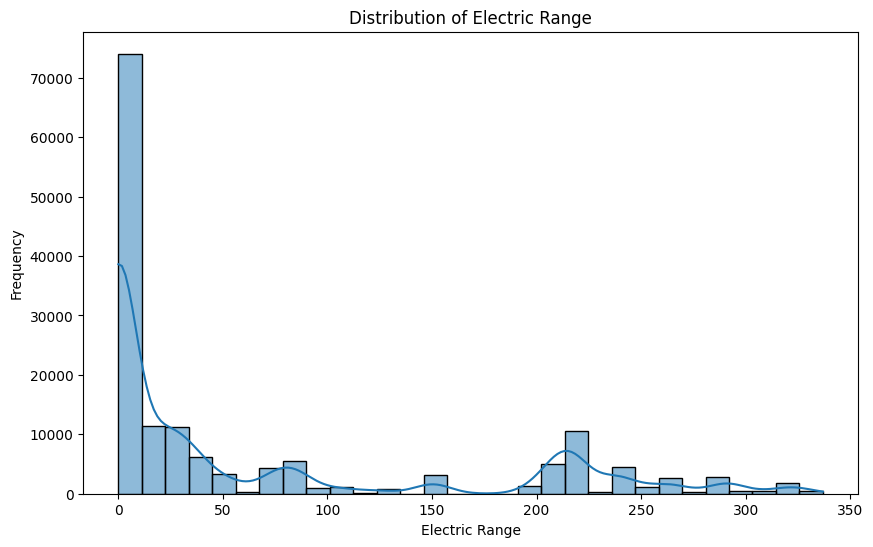

In [7]:
# Summary statistics for electric range
electric_range_summary = data['Electric Range'].describe()

# Histogram of electric range
plt.figure(figsize=(10,6))
sns.histplot(data['Electric Range'], bins=30, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Count the occurrences of each unique county
county_distribution = data['County'].value_counts()

# Display the top 10 counties with the most cars
county_distribution.head(10)

County
King         80637
Snohomish    17727
Pierce       11804
Clark         9066
Thurston      5514
Kitsap        5079
Spokane       3820
Whatcom       3747
Benton        1861
Skagit        1713
Name: count, dtype: int64

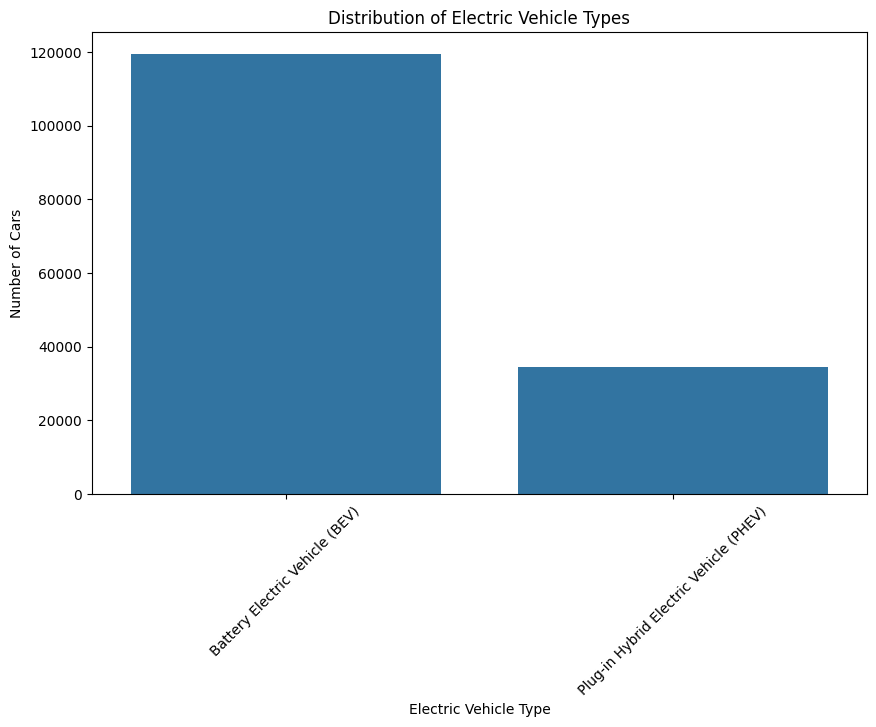

In [9]:
# Count the occurrences of each electric vehicle type
ev_type_distribution = data['Electric Vehicle Type'].value_counts()

# Plot the distribution
plt.figure(figsize=(10,6))
sns.barplot(x=ev_type_distribution.index, y=ev_type_distribution.values)
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

In [18]:
filtered_data = data[data['Base MSRP'] > 0]
price_summary = filtered_data['Base MSRP'].describe()
print(price_summary)

count      3431.000000
mean      57076.815797
std       22725.715898
min       31950.000000
25%       39995.000000
50%       59900.000000
75%       69900.000000
max      845000.000000
Name: Base MSRP, dtype: float64


In [19]:
price_summary = filtered_data['Base MSRP'].describe()
print(price_summary)

count      3431.000000
mean      57076.815797
std       22725.715898
min       31950.000000
25%       39995.000000
50%       59900.000000
75%       69900.000000
max      845000.000000
Name: Base MSRP, dtype: float64


In [20]:
average_price_by_brand = filtered_data.groupby('Make')['Base MSRP'].mean().sort_values(ascending=False)
print(average_price_by_brand)

Make
PORSCHE                 140996.666667
FISKER                  102000.000000
CADILLAC                 75095.000000
TESLA                    70135.321674
VOLVO                    56285.284281
BMW                      52948.035363
CHRYSLER                 39995.000000
MINI                     36864.705882
SUBARU                   34995.000000
WHEEGO ELECTRIC CARS     32995.000000
KIA                      32256.099518
Name: Base MSRP, dtype: float64


In [21]:
# Calculate the average price for each model
average_price_by_model = filtered_data.groupby(['Make', 'Model'])['Base MSRP'].mean().sort_values(ascending=False)
print(average_price_by_model)

Make                  Model     
PORSCHE               918           845000.000000
                      PANAMERA      184400.000000
TESLA                 ROADSTER      105665.625000
FISKER                KARMA         102000.000000
BMW                   740E           90479.032258
PORSCHE               CAYENNE        81100.000000
CADILLAC              CT6            75095.000000
TESLA                 MODEL S        69037.153896
VOLVO                 XC90           64950.000000
BMW                   530E           54316.666667
VOLVO                 XC60           52900.000000
BMW                   330E           44750.000000
CHRYSLER              PACIFICA       39995.000000
MINI                  COUNTRYMAN     36864.705882
SUBARU                CROSSTREK      34995.000000
WHEEGO ELECTRIC CARS  WHEEGO         32995.000000
KIA                   SOUL EV        32809.009009
                      SOUL           31950.000000
Name: Base MSRP, dtype: float64


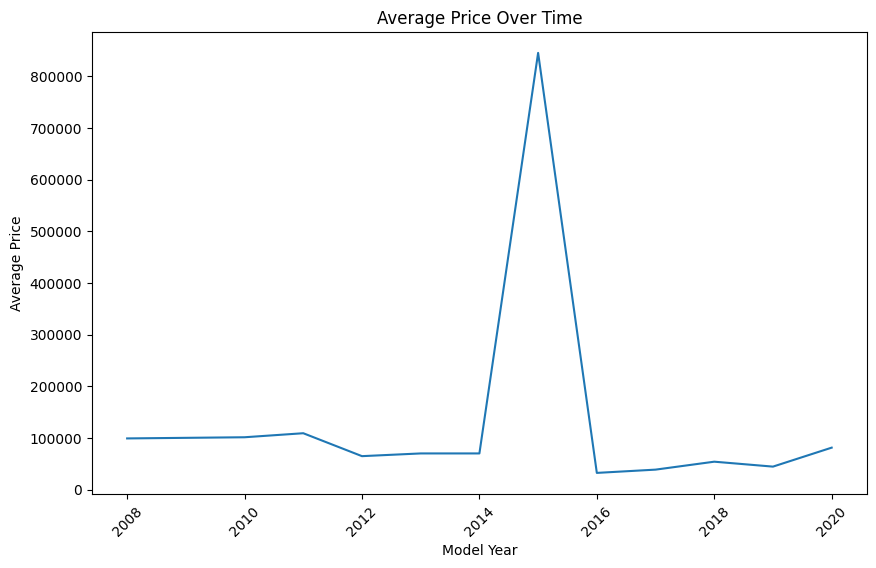

In [22]:
average_price_by_year = filtered_data.groupby('Model Year')['Base MSRP'].mean()

# Plot the average price over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_price_by_year.index, y=average_price_by_year.values)
plt.title('Average Price Over Time')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Count the number of cars with a Base MSRP of 0
zero_msrp_count = (data['Base MSRP'] == 0).sum()
print(f'Number of cars with 0 MSRP: {zero_msrp_count}')


Number of cars with 0 MSRP: 150399


In [25]:
# Filter the data to include only cars with a Base MSRP of 0
zero_msrp_data = data[data['Base MSRP'] == 0]

zero_msrp_model_counts = zero_msrp_data.groupby(['Make', 'Model']).size().reset_index(name='Count')

# Sort the result by the count in descending order to get the models with the most occurrences at the top
zero_msrp_model_counts = zero_msrp_model_counts.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Display the grouped counts of models with 0 MSRP
print(zero_msrp_model_counts)

          Make        Model  Count
0        TESLA      MODEL Y  29209
1        TESLA      MODEL 3  27740
2       NISSAN         LEAF  13276
3        TESLA      MODEL S   5980
4    CHEVROLET      BOLT EV   5910
..         ...          ...    ...
115       AUDI         A8 E      3
116        BMW        745LE      2
117  CHEVROLET  S-10 PICKUP      1
118        BMW           I7      1
119    BENTLEY     BENTAYGA      1

[120 rows x 3 columns]
